<a href="https://colab.research.google.com/github/IvanShcherbak/VK_CUP/blob/main/VK_CUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.lm import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
nltk.download("stopwords") # удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # лемматизация
nltk.download('omw-1.4')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [112]:
train_df = pd.read_csv('train.csv')

In [113]:
train_df.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [114]:
train_df[train_df['oid'] == 365271984] #Взглянем на комментарии для одного пользователя

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
5802,365271984,winter_sport,Саша Трусова о Жене Моховая 9 ЕвгенияМедведева...
8529,365271984,winter_sport,24 апреля 18 55 Первый канал ️ ЕвгенияМедведев...
9795,365271984,winter_sport,По заявкам публики Евгения Медведева и Торнике...
9813,365271984,winter_sport,Кружочки с шоу Влюбленные в фигурное катание и...
13013,365271984,winter_sport,Женя на хоккее ЕвгенияМедведева Evgentokenoid ...
15301,365271984,winter_sport,Сегодня Женя комментировала короткую программу...
23211,365271984,winter_sport,Последний совместный номер Жени Медведевой и Д...
24225,365271984,winter_sport,Женя рассказывает о первом дне в Карелии ️ YAP...
24972,365271984,winter_sport,Еще немного видео с ребятами А теперь внимание...


In [115]:
test_df = pd.read_csv('test.csv')
test_df['text'].iloc[6]

'Уже сейчас ты можешь оформить предзаказ фирменной футболки Дрифт Юг Matstokenoid и получить скидку 10 33 А уже 9 октября на финальном этапе в городе Ростов на Дону вы сможешь эту самую футболку забрать 33 Мерч можно выбрать в черном и белом цвете кардинально разный цвет и настрой. Футболки унисекс заказал себе прихвати и другу подруге. Цена – 2500₽ Со скидкой 2250₽ Тираж ограничен 33 Осталось всего 67 штук.'

In [116]:
test_df.head()

,oid,text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...
1,452466036,Естественное восстановление после тяжелой трен...
2,161038103,Тема нарядов продолжается Одна из британских ж...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...


In [117]:
train_df.shape

(38740, 3)

In [118]:
sample = pd.read_csv('sample_submission.csv')

In [119]:
sample

,oid,category
0,1622114,athletics
1,1663817,autosport
2,3174332,basketball
3,3469228,extreme
4,3905302,boardgames
...,...,...
2621,998309713,esport
2622,998565619,esport
2623,999112505,boardgames
2624,999361308,tennis


In [120]:
test_df.shape

(26260, 2)

In [121]:
train_df.isna().sum() # Изучаем данные на пропуски

oid         0
category    0
text        0
dtype: int64

In [122]:
test_df.isna().sum()

oid     0
text    0
dtype: int64

In [123]:
train_df['category'].value_counts()

autosport       3160
extreme         3110
martial_arts    3050
motosport       3030
boardgames      3020
tennis          3000
esport          2990
athletics       2970
hockey          2950
volleyball      2950
football        2860
basketball      2850
winter_sport    2800
Name: category, dtype: int64

In [124]:
train_df['text']

0        Волшебные фото Виктория Поплавская ЕвгенияМедв...
1        Возвращение в подземелье Треша 33 Эйфория тупо...
2        Лучшие чешские вратари – Доминик Доминатор Гаш...
3        Rtokenoid Warhammer40k валрак решил нас подкор...
4        Шестеркин затаскивает Рейнджерс в финал Восточ...
                               ...                        
38735    8 битная буря снова накрыла пикселями автомоби...
38736    Ира Сидоркова объясняет как сказалась на ее ма...
38737    24 я ракетка мира хорват Марин Чилич обыграл и...
38738    Стал известен календарь мужской сборной России...
38739    Первенство ВХЛ. Первый этап Динамо Алтай Бн ЦС...
Name: text, Length: 38740, dtype: object

In [125]:
y = train_df['category'].value_counts()

In [126]:
stop = stopwords.words('russian')

In [127]:
lemmatize = nltk.WordNetLemmatizer()

In [128]:
def preproc(df)->list:
  new_text = list()
  for row in df.text:
      text = re.sub("[^а-яА-Я]"," ",row)
      text = nltk.word_tokenize(text,language = "russian")
      texts = [lemmatize.lemmatize(word) for word in text]
      texts = " ".join(texts) 
      new_text.append(texts)
  return new_text

In [129]:
train_text = preproc(train_df)

In [130]:
print(f'Длина списка:{len(train_text)}')

Длина списка:38740


In [131]:
encode = LabelEncoder() #Кодируем колонку 'category'
train_df['category'] = encode.fit_transform(train_df['category'])

In [132]:
train_df

,oid,category,text
0,365271984,12,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,5,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,6,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,3,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,7,Шестеркин затаскивает Рейнджерс в финал Восточ...
...,...,...,...
38735,910636962,1,8 битная буря снова накрыла пикселями автомоби...
38736,669736851,1,Ира Сидоркова объясняет как сказалась на ее ма...
38737,558919241,10,24 я ракетка мира хорват Марин Чилич обыграл и...
38738,776944963,11,Стал известен календарь мужской сборной России...


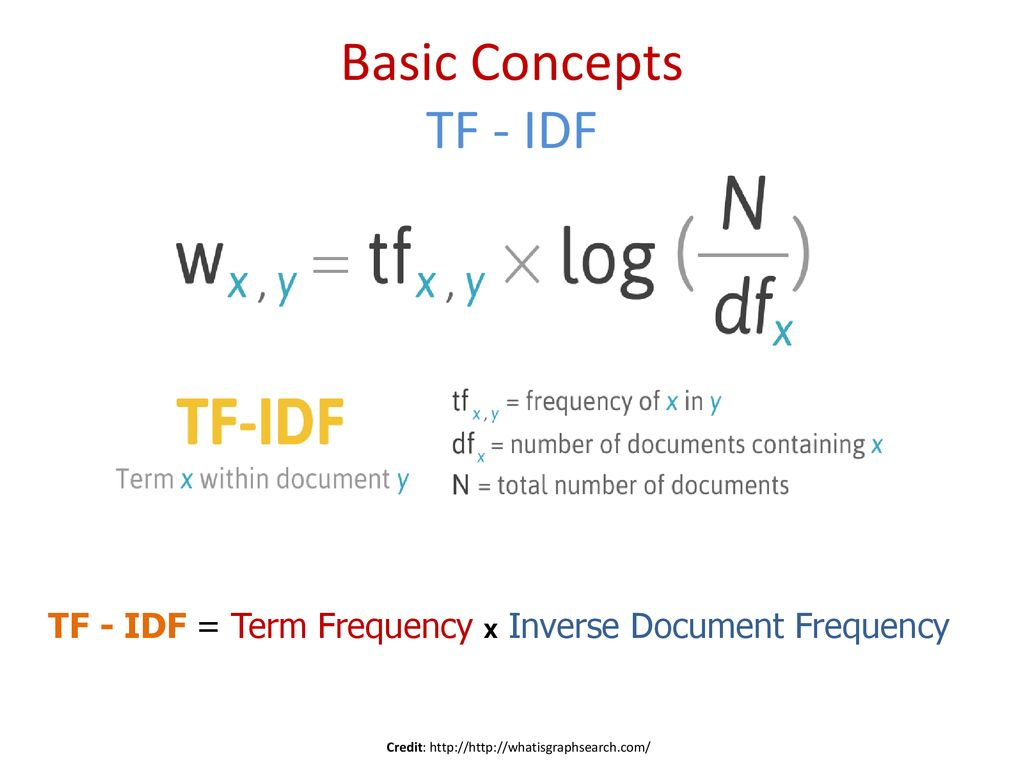

In [133]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop)
values = tfidf_vectorizer.fit(train_text)

In [134]:
new_train = values.transform(train_text) #Получаем tf-idf матрицу

In [135]:
new_train.shape

(38740, 134472)

In [136]:
#Разделяем выборку
X=new_train
y = train_df['category']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [137]:
sgd = SGDClassifier(alpha=0.00001)
sgd.fit(x_train, y_train)

SGDClassifier(alpha=1e-05)

In [138]:
y_pred = sgd.predict(x_test)

In [139]:
print(precision_score(y_test, y_pred,average='micro'))

0.8448115642746515


In [169]:
score = cross_val_score(sgd, X, y, cv=5) #Кросс-валидация
score

array([0.84473412, 0.83505421, 0.84796076, 0.84770263, 0.84254001])

In [140]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       693
           1       0.83      0.85      0.84       774
           2       0.88      0.91      0.89       676
           3       0.95      0.90      0.92       790
           4       0.72      0.70      0.71       765
           5       0.75      0.72      0.74       824
           6       0.80      0.79      0.79       727
           7       0.84      0.87      0.86       741
           8       0.79      0.77      0.78       741
           9       0.87      0.87      0.87       765
          10       0.95      0.95      0.95       753
          11       0.85      0.91      0.88       717
          12       0.87      0.86      0.87       719

    accuracy                           0.84      9685
   macro avg       0.85      0.85      0.85      9685
weighted avg       0.84      0.84      0.84      9685



In [141]:
test_text = preproc(test_df)

In [142]:
new_test = values.transform(test_text)

In [143]:
ans = sgd.predict(new_test)

In [145]:
inv = encode.inverse_transform(ans) #Возвращаем категориальный признак из числового
inv

array(['esport', 'martial_arts', 'tennis', ..., 'boardgames',
       'volleyball', 'athletics'], dtype=object)

In [146]:
answer1 = pd.DataFrame(data = inv ,columns=['category'])
answer1['oid'] = test_df['oid']
answer1

,category,oid
0,esport,749208109
1,martial_arts,452466036
2,tennis,161038103
3,esport,663621910
4,tennis,566255305
...,...,...
26255,boardgames,169728316
26256,volleyball,279369911
26257,boardgames,600699419
26258,volleyball,560223506


In [147]:
new_df = answer1[['oid','category']]

In [162]:
print(new_df,new_df.shape)

             oid      category
0      749208109        esport
1      452466036  martial_arts
2      161038103        tennis
3      663621910        esport
4      566255305        tennis
...          ...           ...
26255  169728316    boardgames
26256  279369911    volleyball
26257  600699419    boardgames
26258  560223506    volleyball
26259  724673712     athletics

[26260 rows x 2 columns] (26260, 2)


In [150]:
new_df['category'].value_counts()

esport          2188
winter_sport    2176
boardgames      2097
volleyball      2048
motosport       2016
athletics       2000
tennis          1998
extreme         1991
martial_arts    1976
hockey          1968
basketball      1967
football        1952
autosport       1883
Name: category, dtype: int64

In [160]:
new_df[new_df['oid'] == 750586033]['category'].value_counts()

martial_arts    6
boardgames      1
extreme         1
esport          1
autosport       1
Name: category, dtype: int64

In [163]:
new_df[new_df['oid'] == 750586033]['category'].mode()[0] 

'martial_arts'

In [164]:
new_df.to_csv("predict.csv",index=False)

In [ ]:
from google.colab import files
files.download("predict.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>